In [27]:
import pandas as pd 

data = pd.read_csv('p_movie_1.csv') #Here we read the dataset we find, we use 2 parts of the whole datasets


In [28]:
data = data[:1000]

In [29]:
import nltk
from nltk.corpus import stopwords

raw_data = data[['score','text']]
stops = set(stopwords.words('english'))
text = raw_data['text']

from bs4 import BeautifulSoup
import re

web = r'www\.[^ ]+'

def comment_to_words(text):
    '''
    clean comments
    '''
    text = str(text)
    text = BeautifulSoup(text).get_text()

    words = re.sub("[^a-zA-Z]", " ", text)
    words = words.lower().split()
    words = [w for w in words if not w in stops]

    words = " ".join(words)

    return words

In [30]:
from tqdm import tqdm
n_text = len(text)
clean_text = []
for i in range(n_text):
    if (i+1)%100000 == 0:
        print('{} have been cleaned!'.format((i+1)/n_text))
    
    clean_text.append(comment_to_words(text[i]))

In [44]:
def drop_nan(data):
    for i, value in enumerate(data.score.values):
        try:
            value = float(value)
            # print(i)
        except:
            data.drop(labels=i,inplace=True)

In [45]:
clean_data = pd.DataFrame(clean_text,columns=['text'])
clean_data['score'] = raw_data['score']
drop_nan(clean_data)
clean_data.reset_index(drop=True, inplace=True)
# clean_data.head

In [46]:
type(clean_data.score)

pandas.core.series.Series

In [34]:
# clean_data.to_csv('clean_data_1.csv') #this is the data without noisy 

In [47]:
clean_data = clean_data.dropna(how='any')
clean_data.reset_index(drop=True)
# clean_data.to_csv('f_clean_1.csv') #nan removal

,text,score
0,watched movie big alex loughlin fan made even ...,4.0
1,powersomg watched movie last night pretty much...,5.0
2,found movie couple years back loved great movi...,5.0
3,first tried watch movie finish later went back...,5.0
4,review cover dvd tells grossest film reviewer ...,2.0
...,...,...
995,glad getting dvdsaw many times kidit funnyand ...,5.0
996,sequels always terrible always better original...,5.0
997,steven spielberg blockbuster jaws brilliant mo...,3.0
998,sequal good way bring hungry vengeful great wh...,4.0


In [36]:


# data1 = pd.read_csv('f_clean.csv')
# data2 = pd.read_csv('f_clean_1.csv')

In [37]:
# data1.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace=True)
# data2.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace=True)

In [38]:
# df = pd.DataFrame(columns=['text','score'])
# data = [data1, data2]
# df = pd.concat(data, ignore_index=True,axis=0, verify_integrity=True)


In [39]:
# df.to_csv('final_raw.csv')

In [62]:
# import pandas as pd
df = pd.read_csv('final_raw.csv')

In [63]:
df = df[:1000]

In [64]:
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer

In [79]:
def wordcloud_fig(data, colormap='viridis'):
    words = []
    for t in data.text:
        words.append(t)
    # print(words)
    words = pd.Series(words).str.cat(sep=' ')
    wordcloud = WordCloud(width=1000, height=500, max_font_size=150, colormap=colormap).generate(words)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

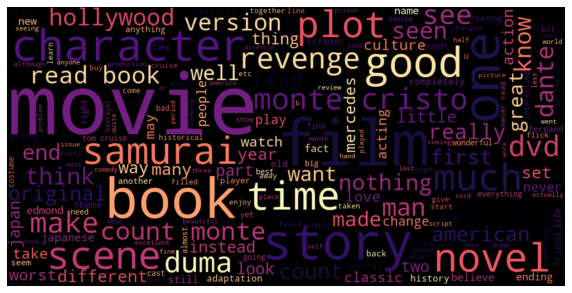

In [80]:
wordcloud_fig(df[(df.score) < 3],'magma') #plot figure based on text

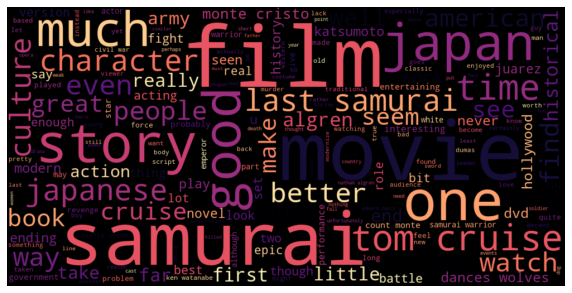

In [69]:
wordcloud_fig(df[(df.score) == (3)], 'magma')


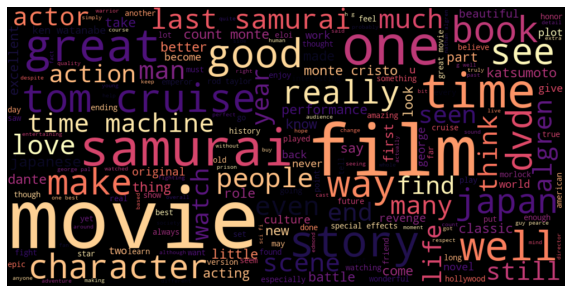

In [70]:
wordcloud_fig(df[df.score > 3], 'magma')

In [71]:
count_vec = CountVectorizer(stop_words='english')
count_vec.fit(df.text)
print('number of unique words:'+ str(len(count_vec.get_feature_names())))

number of unique words:11445


In [72]:
def word_freq(data, max_features):
    count_vec = CountVectorizer(stop_words = 'english')
    count_vec.fit(data.text)
    print('number of unique words:'+ str(len(count_vec.get_feature_names())))

    neg_mat = count_vec.transform(data[data.score < 3].text)
    pos_mat = count_vec.transform(data[data.score > 3].text)
    neu_mat = count_vec.transform(data[data.score == 3].text)
    neg_freq = np.squeeze(np.asarray(np.sum(neg_mat, axis=0)))
    pos_freq = np.squeeze(np.asarray(np.sum(pos_mat, axis=0)))
    neu_freq = np.squeeze(np.asarray(np.sum(neu_mat, axis=0)))

    df_freq = pd.DataFrame([neg_freq, neu_freq, pos_freq], columns=count_vec.get_feature_names()).transpose()
    df_freq.columns = ['neg','neu','pos']
    df_freq['total'] = df_freq['neg'] + df_freq['neu'] + df_freq['pos']
    df_freq = df_freq.sort_values('total', ascending=False)

    return df_freq

In [73]:
def plot_top(data, n, sentiment):
    y = np.arange(n)

    plt.figure(figsize=(10,8))
    plt.bar(y, data.sort_values(by=sentiment, ascending=False)[sentiment][:n], align='center', alpha=0.5)
    plt.xticks(y, data.sort_values(by=sentiment, ascending=False).index[:n], rotation=90)
    plt.xlabel('word')
    plt.ylabel('frequecy')

In [74]:
df_freq = word_freq(df, 50000)

number of unique words:11445


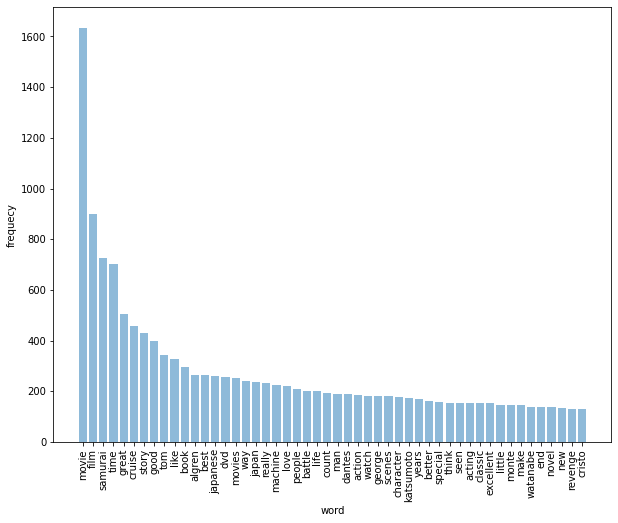

In [75]:
plot_top(df_freq, 50, 'pos')

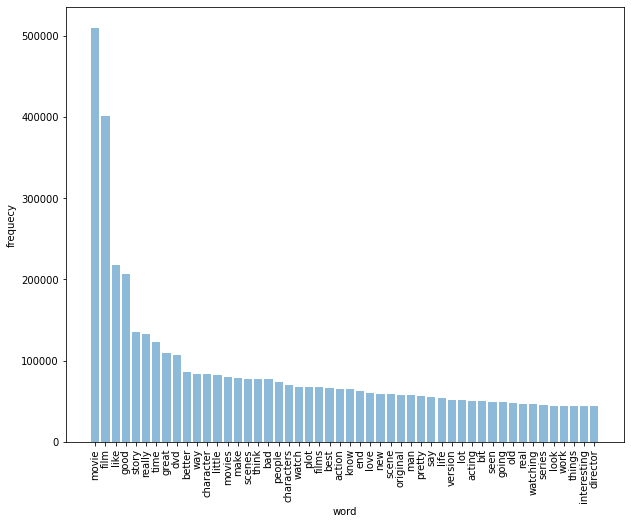

In [ ]:
plot_top(df_freq, 50, 'neu')

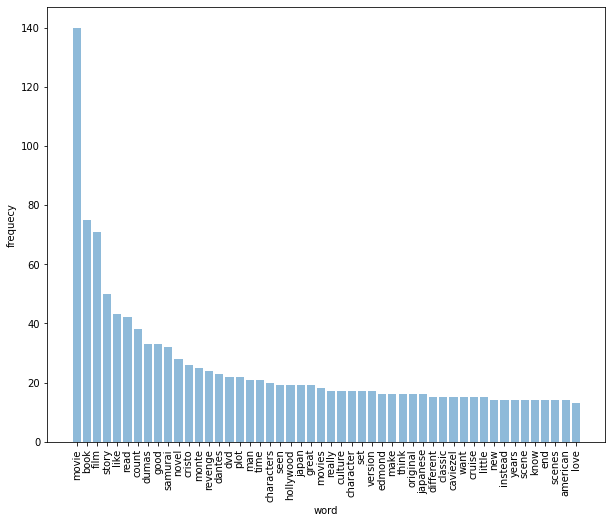

In [76]:
plot_top(df_freq, 50, 'neg')